**Name: Hoda Shoghi**

**Contact: hoda.shoghi@gmail.com**

**Date: 27 July 2023**

### Project Title: 

# Predicting Restaurant Ratings: A Data-Driven Approach

### Step1: Cleaning and EDA:
As 1st step I  will perform basic EDA and data cleaning to get familiarize with Yelp's business dataset.

#### Dataset
The Yelp dataset offers a wealth of information about businesses across several cities. This project focuses specifically on restaurant businesses. The dataset includes attributes such as business ID, name, location, review count, categories, and star ratings.

| COLUMN NAME  | DESCRIPTION                                                    | DATA TYPE |
|--------------|----------------------------------------------------------------|-----------|
| business_id  | Unique identifier for the business                             | string    |
| name         | Name of the business                                           | string    |
| address      | Address where the business is located                          | string    |
| city         | City where the business is located                             | string    |
| state        | State where the business is located                            | string    |
| postal_code  | postal_code where the business is located                      | string    |
| latitude     | Geographical latitude of the business                          | float64   |
| longitude    | Geographical longitude of the business                         | float64   |
| stars        | Star rating of the business                                    | float64   |
| review_count |  Number of reviews the business has received                   | int64     |
| is_open      | 0 is closed and 1 is open                                      | int64     |
| attributes   | Dict-different attribute like payment method,  , etc | string  |
| categories   | Categories the business falls under                            | string    |
| hours        | Dict-Hours of operation                                        | string    |


#### Data Notes :
1- Yelp's dataset covers various types of businesses. For this project, I focus on businesses categorized as "Restaurants".

2- The `categories` column can contain multiple categories for a single business. For example, a restaurant can be categorized as both 'Italian' and 'Pizza'.

3- Yelp users rate businesses on a scale of 1 to 5 stars. This serves as our target variable, which we aim to predict with our model.

4- `attribute` Column contains dictionary of different attributes and their values

5- There are some nested dictionaries inside `attributes` Column like `Ambience` or `Business Parking`

#### My goal :

My goal is to build a predictive model that can accurately predict a restaurant's star rating by leveraging the vast amount of information in the dataset. This model can provide prospective Steakholders with insights into how certain factors might influence their new establishment's ratings.



### Step1-2  Basic Data Wrangling
1- What is the shape of the dataframe?

2- What kind of data is stored in each column? How are they distributed?

3- Are there any columns that contain duplicate information? If so, remove the redundant columns.

4- Are there any null values in the dataframe? If so, handle them appropriately.


First lets open the **jason** datasaet which is downloaded from Yelp website

In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df_b = pd.read_csv('data/Cleaned_Data.csv')


# Logistic Regression & Ridge Regression

In [145]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df_b.drop(columns=['Rating_Success']) # Assuming 'Rating_Success' is your target variable
y = df_b['Rating_Success']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Creating and fitting the logistic regression model with L1 penalty
log_reg_l1 = LogisticRegression(penalty='l1', solver='liblinear')
log_reg_l1.fit(X_train_scaled, y_train)

# Evaluating the model on the train data
train_score = log_reg_l1.score(X_train, y_train)
print(f'Train Accuracy: {train_score}')

# Evaluating the model on the test data
test_score = log_reg_l1.score(X_test, y_test)
print(f'Test Accuracy: {test_score}')

# Evaluating the model on the Sacaled train data
train_score = log_reg_l1.score(X_train_scaled, y_train)
print(f'Scaled Train Accuracy: {train_score}')


# Evaluating the model on the Scaled test data
test_score = log_reg_l1.score(X_test_scaled, y_test)
print(f'Scaled Test Accuracy: {test_score}')

Train Accuracy: 0.6115992484526968
Test Accuracy: 0.6093739926503772
Scaled Train Accuracy: 0.7065097259062776
Scaled Test Accuracy: 0.6959577074334343


X has feature names, but LogisticRegression was fitted without feature names
X has feature names, but LogisticRegression was fitted without feature names


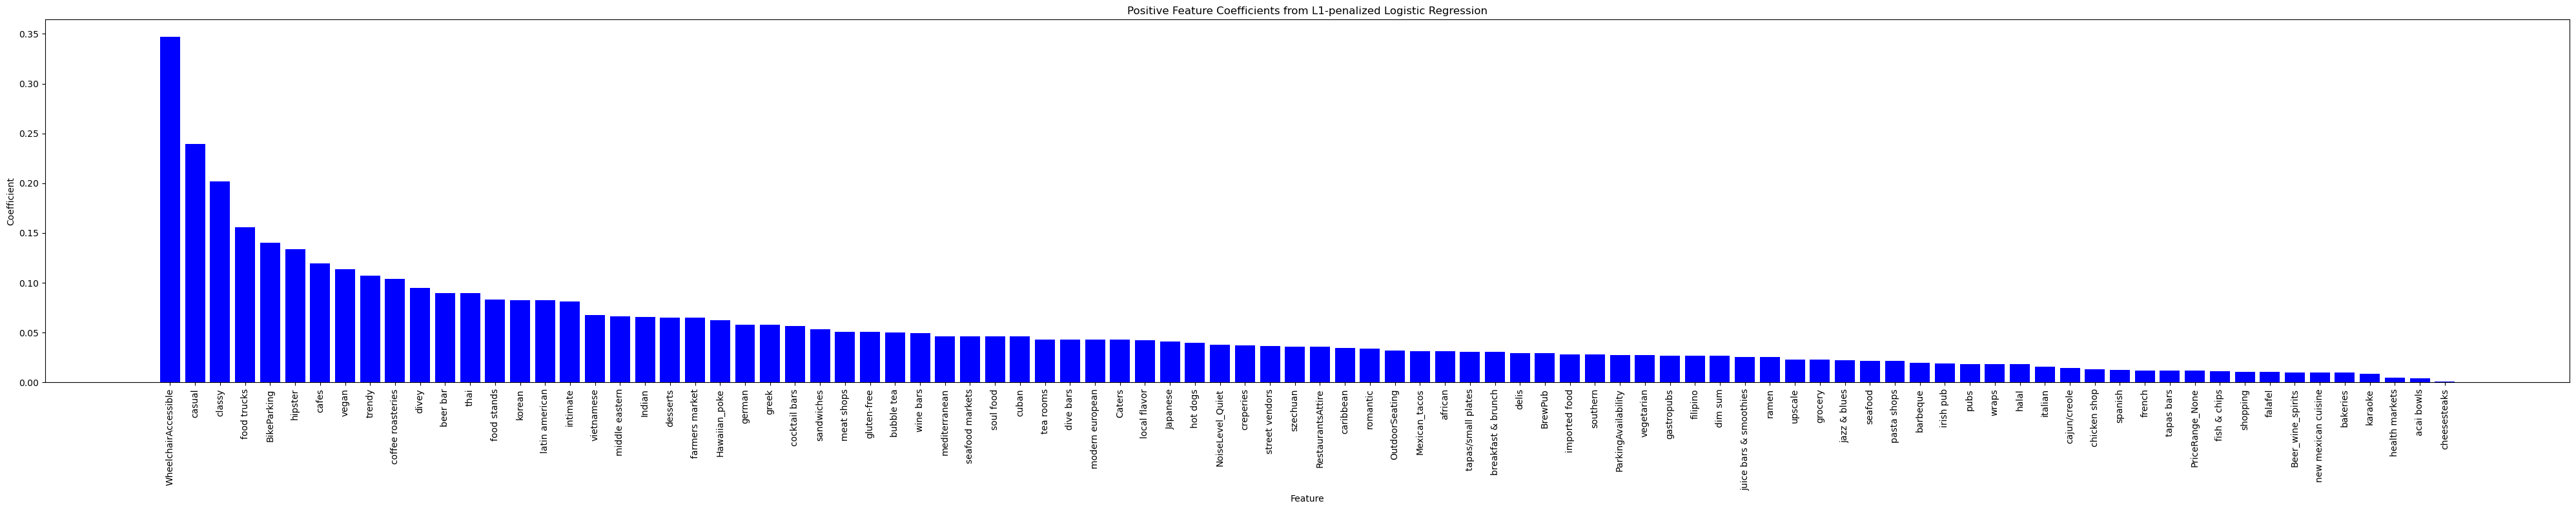

In [146]:

# Get feature names
features = X.columns

# Get coefficients and feature names
coefs = log_reg_l1.coef_[0]

# Create indices for sorting based on coefficients
sorted_idx = np.argsort(coefs)

# Separate and sort positive and negative coefficients
sorted_negative_coefs = coefs[sorted_idx][coefs[sorted_idx] < 0]
sorted_positive_coefs = coefs[sorted_idx][coefs[sorted_idx] > 0][::-1]

# Sort feature names based on the same order
sorted_features_neg = np.array(features)[sorted_idx][coefs[sorted_idx] < 0]
sorted_features_pos = np.array(features)[sorted_idx][coefs[sorted_idx] > 0][::-1]

# Plot positive coefficients
plt.figure(figsize=(40, 8))
plt.bar(sorted_features_pos, sorted_positive_coefs, color='blue')
plt.title("Positive Feature Coefficients from L1-penalized Logistic Regression")
plt.xlabel("Feature")
plt.ylabel("Coefficient")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()



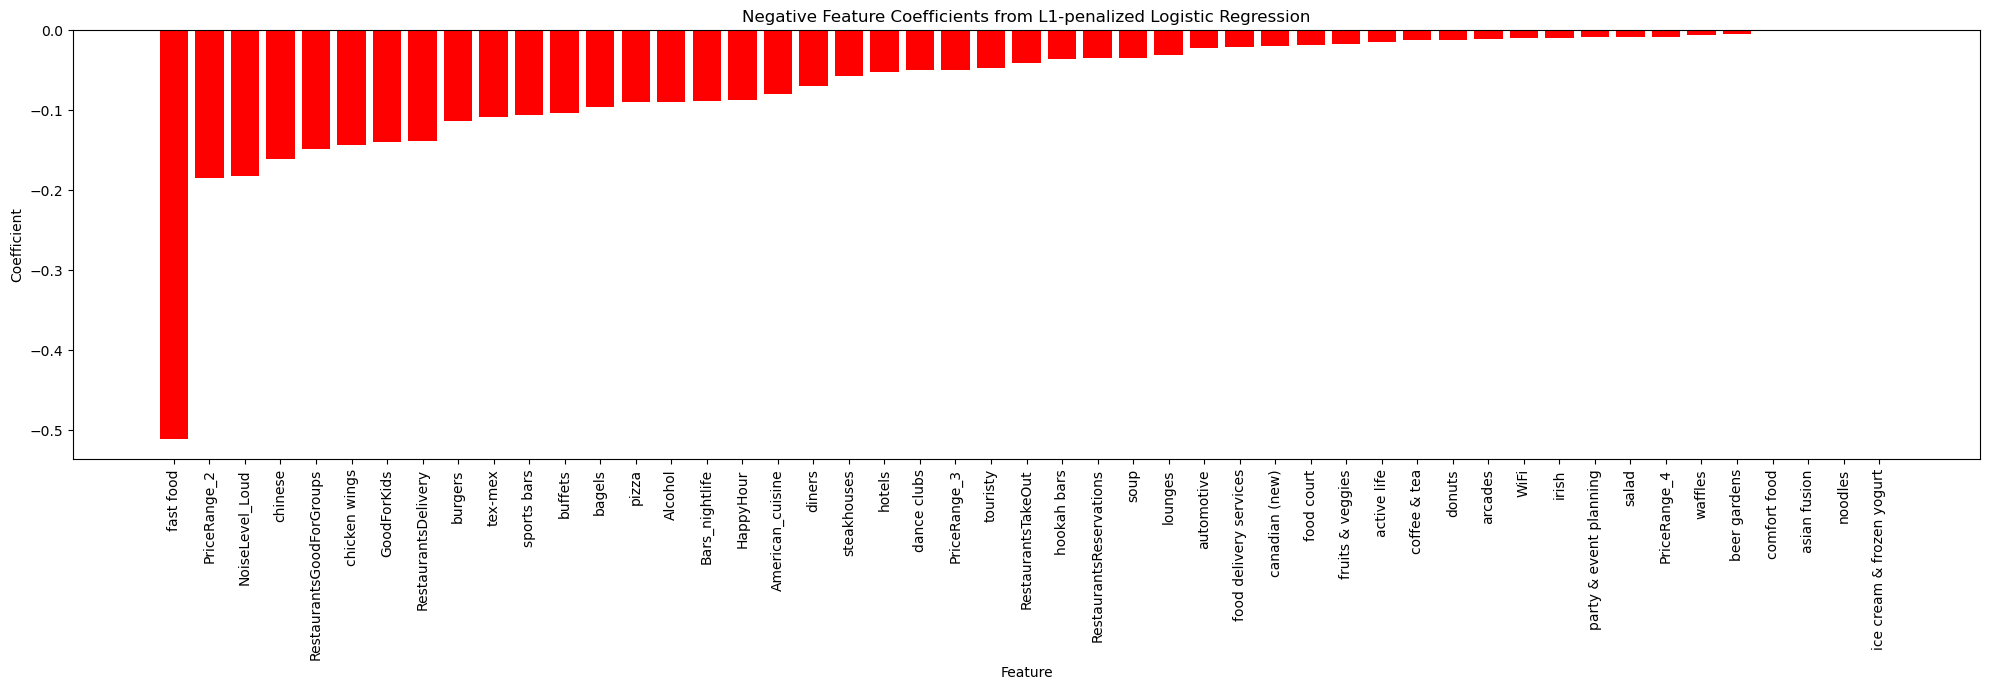

In [147]:
# Plot negative coefficients
plt.figure(figsize=(20, 7))
plt.bar(sorted_features_neg, sorted_negative_coefs, color='red')
plt.title("Negative Feature Coefficients from L1-penalized Logistic Regression")
plt.xlabel("Feature")
plt.ylabel("Coefficient")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [148]:
# Select top 10 positive and negative coefficients
top_10_positive_coefs = sorted_positive_coefs[:10]
top_10_negative_coefs = sorted_negative_coefs[:10]

# Select top 10 positive and negative feature names
top_10_features_pos = sorted_features_pos[:10]
top_10_features_neg = sorted_features_neg[:10]

# Print top 10 positive coefficients and their features
print("Top 10 Positive Coefficients and their Features:")
for coef, feat in zip(top_10_positive_coefs, top_10_features_pos):
    print(f"{feat}: {coef}")

print("\n")  # for a newline in between

# Print top 10 negative coefficients and their features
print("Top 10 Negative Coefficients and their Features:")
for coef, feat in zip(top_10_negative_coefs, top_10_features_neg):
    print(f"{feat}: {coef}")


Top 10 Positive Coefficients and their Features:
WheelchairAccessible: 0.3470053470552177
casual: 0.23915048658084315
classy: 0.2018513581708337
food trucks: 0.15573257467958448
BikeParking: 0.14042990479547193
hipster: 0.13364790534964657
cafes: 0.11963933078628064
vegan: 0.11358555104311975
trendy: 0.10708394448589828
coffee roasteries: 0.10414904786206593


Top 10 Negative Coefficients and their Features:
fast food: -0.5107292143694747
PriceRange_2: -0.18474002096635836
NoiseLevel_Loud: -0.18231561046504507
chinese: -0.16062167690889023
RestaurantsGoodForGroups: -0.14787966600529542
chicken wings: -0.14286981479546526
GoodForKids: -0.13944674331919737
RestaurantsDelivery: -0.13836065622902416
burgers: -0.11328876494192282
tex-mex: -0.10886252158688867


In [149]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming 'Rating_Success' is your target variable
X = df_b.drop(columns=['Rating_Success'])
y = df_b['Rating_Success']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=42)

# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Creating and fitting the logistic regression model with L2 penalty
log_reg_l2 = LogisticRegression(penalty='l2', solver='liblinear')
log_reg_l2.fit(X_train_scaled, y_train)

# Evaluating the model on the Scaled train data
train_score_scaled = log_reg_l2.score(X_train_scaled, y_train)
print(f'Scaled Train Accuracy with L2 penalty: {train_score_scaled}')

# Evaluating the model on the Scaled test data
test_score_scaled = log_reg_l2.score(X_test_scaled, y_test)
print(f'Scaled Test Accuracy with L2 penalty: {test_score_scaled}')


Scaled Train Accuracy with L2 penalty: 0.7062009206607095
Scaled Test Accuracy with L2 penalty: 0.6990561658672443


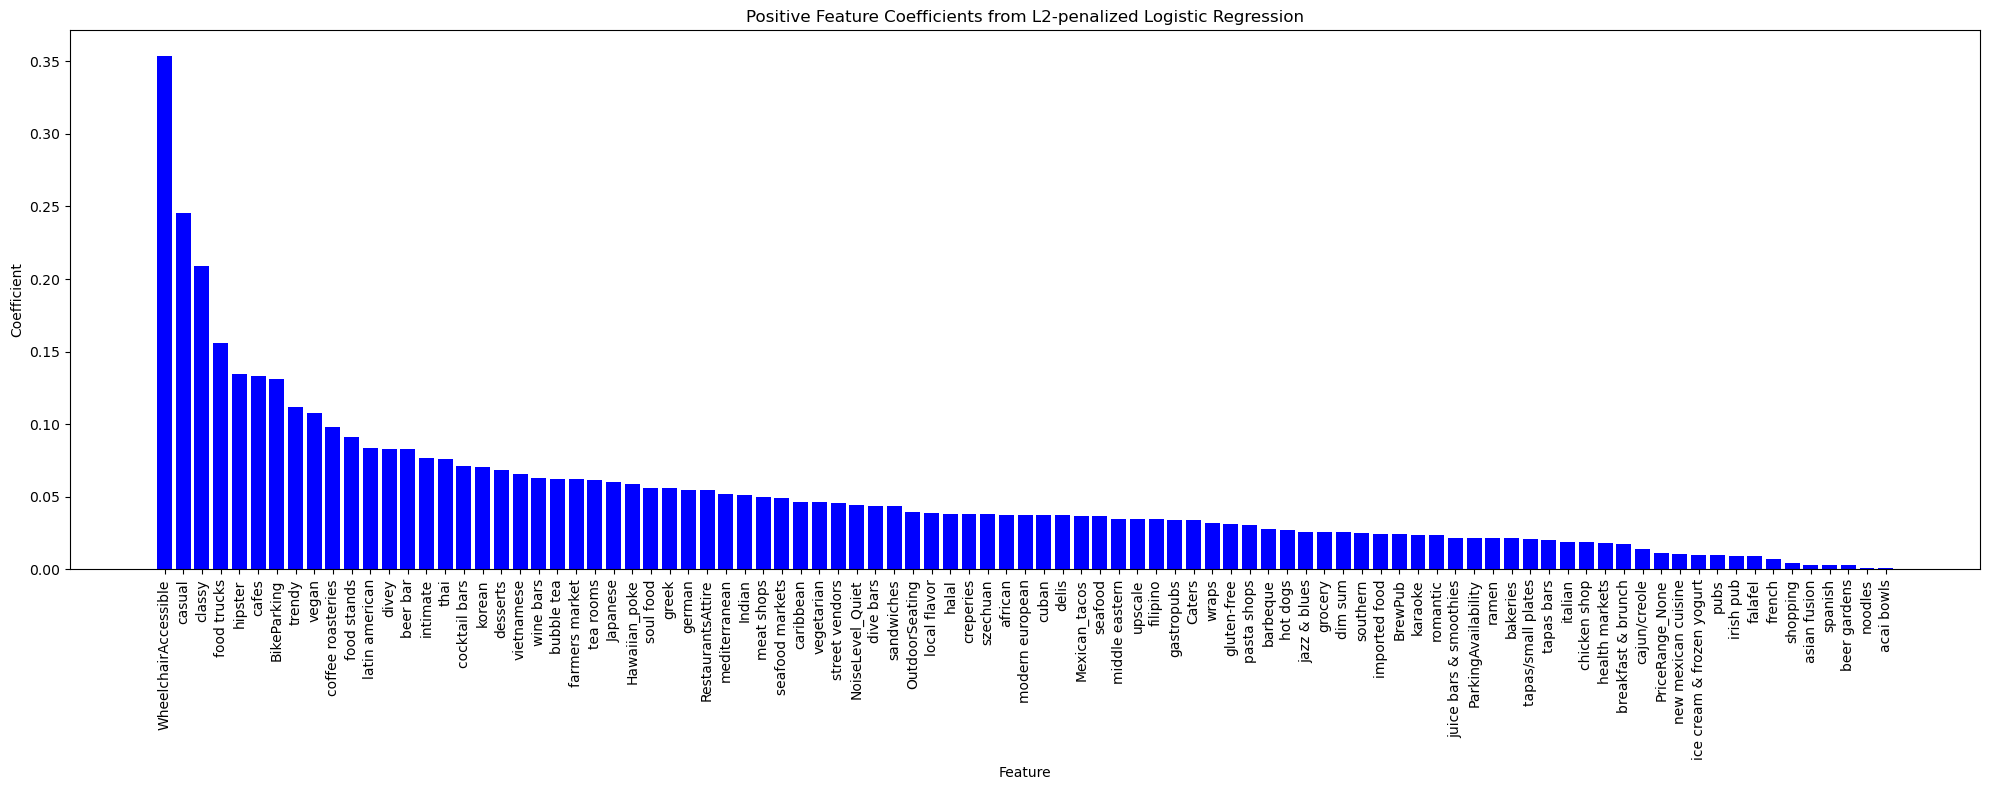

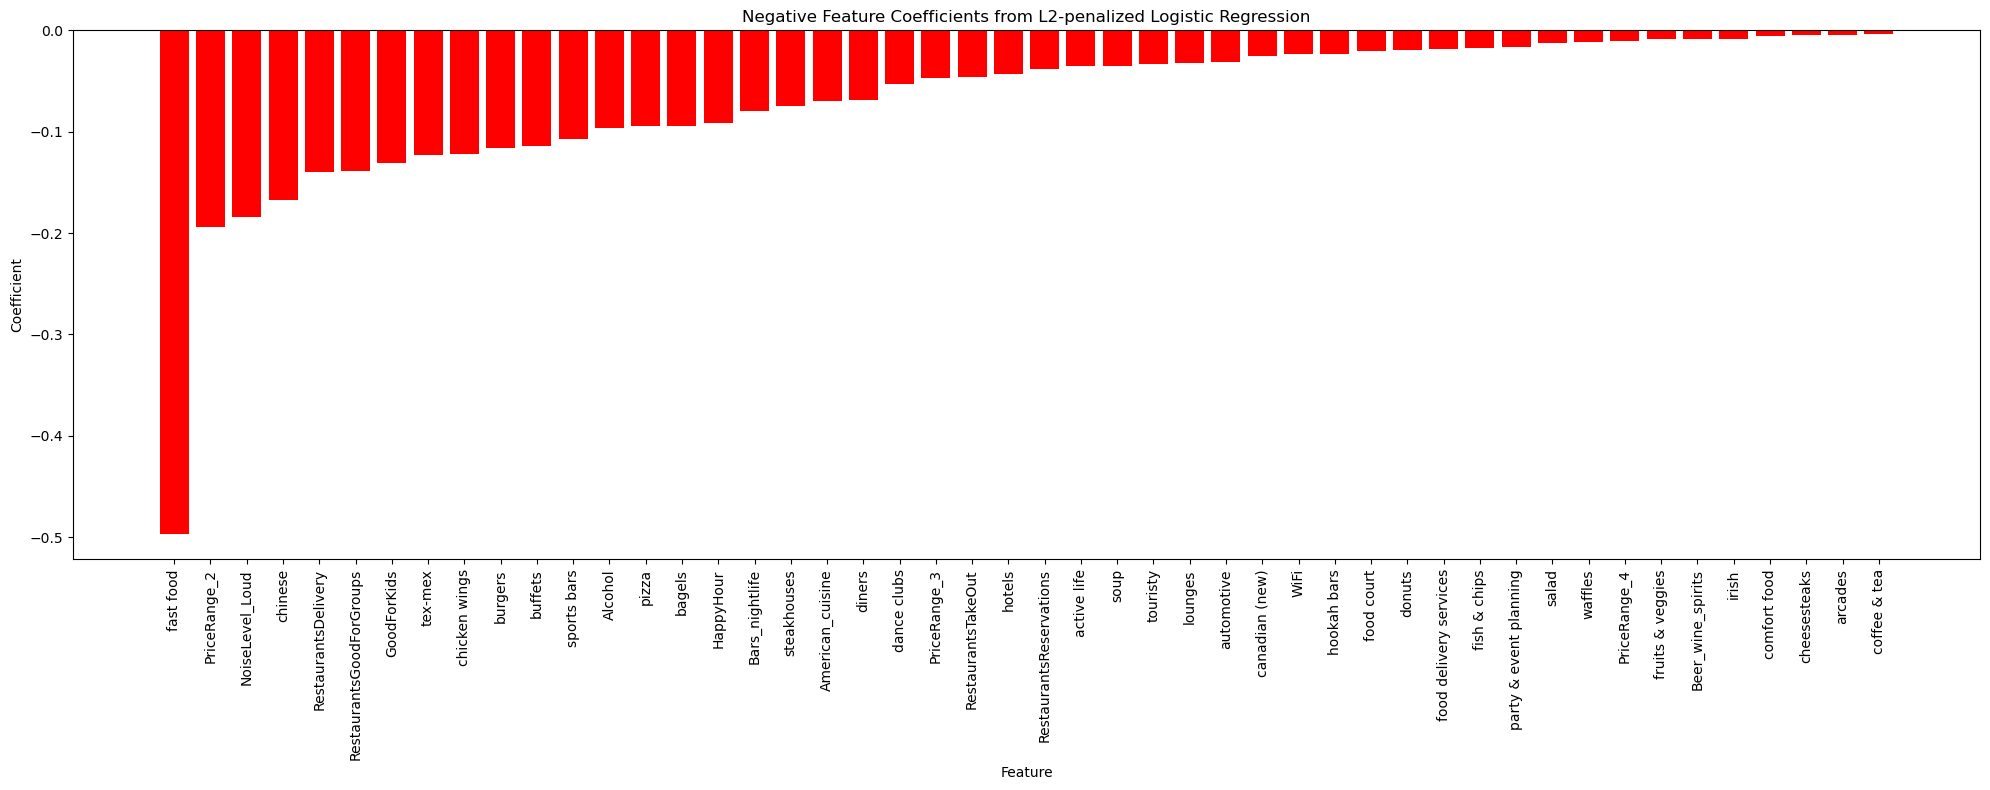

In [150]:
import numpy as np
import matplotlib.pyplot as plt

# Get feature names
features = X.columns

# Get coefficients and feature names
coefs = log_reg_l2.coef_[0]

# Create indices for sorting based on coefficients
sorted_idx = np.argsort(coefs)

# Separate and sort positive and negative coefficients
sorted_negative_coefs = coefs[sorted_idx][coefs[sorted_idx] < 0]
sorted_positive_coefs = coefs[sorted_idx][coefs[sorted_idx] > 0][::-1]

# Sort feature names based on the same order
sorted_features_neg = np.array(features)[sorted_idx][coefs[sorted_idx] < 0]
sorted_features_pos = np.array(features)[sorted_idx][coefs[sorted_idx] > 0][::-1]

# Plot positive coefficients
plt.figure(figsize=(20, 8))
plt.bar(sorted_features_pos, sorted_positive_coefs, color='blue')
plt.title("Positive Feature Coefficients from L2-penalized Logistic Regression")
plt.xlabel("Feature")
plt.ylabel("Coefficient")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Plot negative coefficients
plt.figure(figsize=(20, 8))
plt.bar(sorted_features_neg, sorted_negative_coefs, color='red')
plt.title("Negative Feature Coefficients from L2-penalized Logistic Regression")
plt.xlabel("Feature")
plt.ylabel("Coefficient")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [151]:
# Select top 10 positive and negative coefficients
top_10_positive_coefs = sorted_positive_coefs[:10]
top_10_negative_coefs = sorted_negative_coefs[:10]

# Select top 10 positive and negative feature names
top_10_features_pos = sorted_features_pos[:10]
top_10_features_neg = sorted_features_neg[:10]

# Print top 10 positive coefficients and their features
print("Top 10 Positive Coefficients and their Features:")
for coef, feat in zip(top_10_positive_coefs, top_10_features_pos):
    print(f"{feat}: {coef}")

print("\n")  # for a newline in between

# Print top 10 negative coefficients and their features
print("Top 10 Negative Coefficients and their Features:")
for coef, feat in zip(top_10_negative_coefs, top_10_features_neg):
    print(f"{feat}: {coef}")

Top 10 Positive Coefficients and their Features:
WheelchairAccessible: 0.3536026864094027
casual: 0.24542938121707525
classy: 0.2087418612123794
food trucks: 0.15605523842225905
hipster: 0.13476606465679436
cafes: 0.13353113432313787
BikeParking: 0.13118029488647118
trendy: 0.11195781881170476
vegan: 0.10750195643248274
coffee roasteries: 0.09778243410174162


Top 10 Negative Coefficients and their Features:
fast food: -0.4972141572514591
PriceRange_2: -0.19427885756782978
NoiseLevel_Loud: -0.18442668203456114
chinese: -0.16748918154022183
RestaurantsDelivery: -0.1393836273286009
RestaurantsGoodForGroups: -0.1383645240582173
GoodForKids: -0.13136178100667487
tex-mex: -0.12314988737721891
chicken wings: -0.12248792916262304
burgers: -0.11640028879472117


## Positive Coefficients - What Drives Restaurant Success?

**Title:** Key Attributes for a Successful Restaurant

- **Inclusivity Matters:** Restaurants with `Wheelchair Accessible` facilities lead the chart. Accessibility isn't just a compliance requirement—it appeals to a broader audience.
- **Ambience:** Whether it's `casual` or `classy`, the atmosphere plays a pivotal role in dining preference. Tailoring the restaurant's ambiance can cater to different market segments.
- **Modern & Trendy Offerings:** `Food trucks`, `hipster` themes, `vegan` menus, and `coffee roasteries` signify the evolving tastes of consumers. Being current and relatable is crucial.
- **Convenience:** With `Bike Parking`, restaurants are catering to urban consumers, promoting both eco-friendliness and convenience.

---


## Negative Coefficients - Potential Pitfalls

**Title:** Red Flags in the Restaurant Industry

- **Quality over Quickness:** `Fast food` tops the negative coefficients, suggesting that there's a preference shift towards quality dining experiences over sheer speed and convenience.
- **Noise Concerns:** `NoiseLevel_Loud` indicates that customers prefer a quieter ambiance, which enhances their dining experience. Loud venues might turn away those seeking conversations and comfort.
- **Menu & Cuisine:** Specific categories like `Chinese`, `chicken wings`, `burgers`, and `tex-mex` are on the negative spectrum. This could be due to oversaturation in the market or evolving consumer tastes.
Absolutely. This particular insight points out a crucial aspect of the restaurant industry. When a particular cuisine or dish becomes widely popular, many restaurants might try to capitalize on that trend. This often leads to a market oversaturation, where customers have too many similar options and it becomes harder for individual restaurants to stand out or maintain high profitability.

On the other hand, evolving consumer tastes play an integral role too. With the world becoming more connected and people being exposed to a variety of cuisines and food cultures, their preferences might be shifting to newer, more exotic, or healthier alternatives. Traditional or overrepresented offerings like Chinese, chicken wings, burgers, and tex-mex might be facing stiff competition from other cuisines that are becoming popular.


- **Service Decisions:** While delivery (`RestaurantsDelivery`) can boost sales, it might detract from in-house dining experiences. Similarly, too much focus on `GoodForKids` or promoting group dining (`RestaurantsGoodForGroups`) might alienate other clientele segments.

---

These insights underline the importance of understanding market dynamics, consumer preferences, and the evolving landscape of the restaurant industry. By keeping an eye on these factors, businesses can make informed decisions to optimize their offerings and thrive in a competitive environment.

In [152]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)


(25851, 141) (25851,)
(25852, 141) (25852,)


# Random Forest

In [153]:
from sklearn.ensemble import RandomForestClassifier

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Create and fit the random forest model
rf_model = RandomForestClassifier(n_estimators=80, max_depth=17, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Evaluating the model on the train data
train_score_rf = rf_model.score(X_train_scaled, y_train)
print(f'Random Forest Scaled Train Accuracy: {train_score_rf}')

# Evaluating the model on the test data
test_score_rf = rf_model.score(X_test_scaled, y_test)
print(f'Random Forest Scaled Test Accuracy: {test_score_rf}')


Random Forest Scaled Train Accuracy: 0.7966809794592086
Random Forest Scaled Test Accuracy: 0.6993269379545103


# Feature_importances

In [154]:
importances = rf_model.feature_importances_
feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
})
feature_importances.sort_values(by='Importance', ascending=False, inplace=True)


In [155]:
feature_importances.head(30)

,Feature,Importance
122,WheelchairAccessible,0.093560
38,fast food,0.084279
14,burgers,0.030609
130,classy,0.026868
114,RestaurantsDelivery,0.024728
134,NoiseLevel_Loud,0.024295
123,BikeParking,0.023758
126,casual,0.023400
117,RestaurantsGoodForGroups,0.023202
113,GoodForKids,0.022264


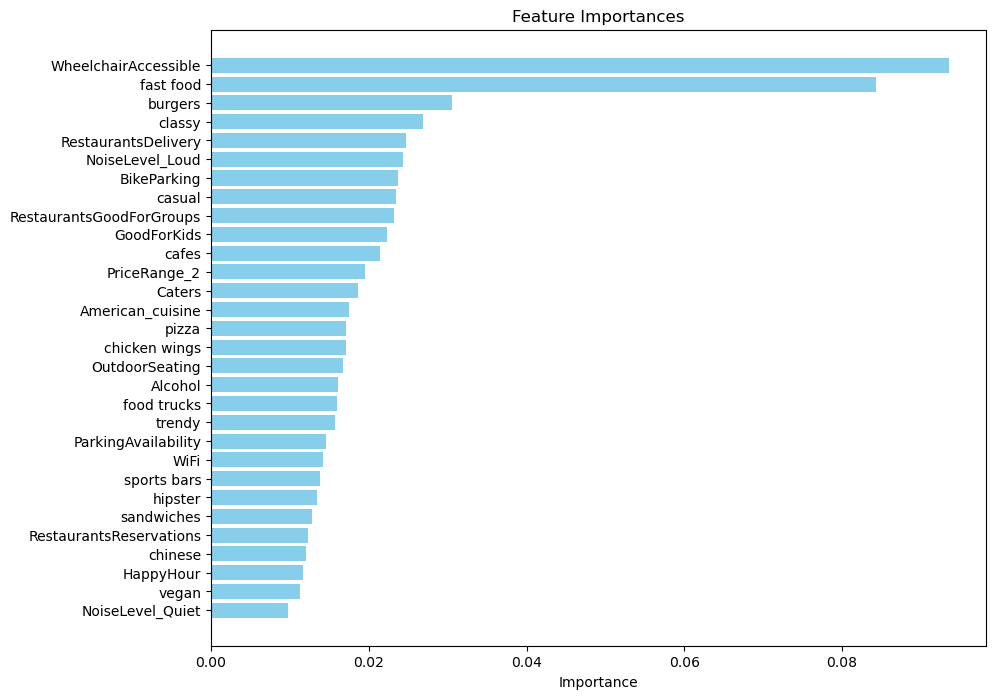

In [156]:
import matplotlib.pyplot as plt

# Assuming your code to get the feature_importances dataframe is here

# Selecting top 20 features
top_features = feature_importances.head(30)

# Plotting
plt.figure(figsize=(10, 8))
plt.barh(top_features['Feature'], top_features['Importance'], align='center', color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.gca().invert_yaxis()  # To display the feature with the highest importance at the top
plt.show()


In [157]:
sorted_importances = feature_importances.sort_values(by='Importance', ascending=False)

cumulative_importance = sorted_importances['Importance'].cumsum()
retained_features = sorted_importances[cumulative_importance <= 0.95]['Feature'].tolist()


In [158]:
X_train_filtered = X_train[retained_features]
X_test_filtered = X_test[retained_features]


In [159]:
scaler = StandardScaler()
X_train_scaled_filtered = scaler.fit_transform(X_train_filtered)
X_test_scaled_filtered = scaler.transform(X_test_filtered)


In [160]:
rf_model.fit(X_train_scaled_filtered, y_train)

train_score_rf_filtered = rf_model.score(X_train_scaled_filtered, y_train)
print(f'Random Forest Filtered Scaled Train Accuracy: {train_score_rf_filtered}')

test_score_rf_filtered = rf_model.score(X_test_scaled_filtered, y_test)
print(f'Random Forest Filtered Scaled Test Accuracy: {test_score_rf_filtered}')


Random Forest Filtered Scaled Train Accuracy: 0.8077830644849329
Random Forest Filtered Scaled Test Accuracy: 0.7039300634380319


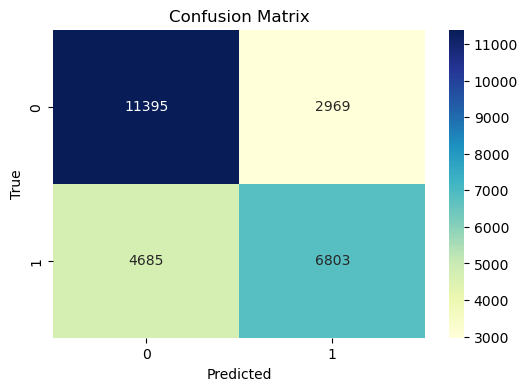

In [161]:

from sklearn.metrics import confusion_matrix

# Predict the labels
y_pred = rf_model.predict(X_test_scaled_filtered)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='g', cmap="YlGnBu")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


# GradientBoostingClassifier

In [162]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the Gradient Boosting classifier
gboost = GradientBoostingClassifier(n_estimators=250, random_state=42)

# Fit the model using the scaled and filtered training data
gboost.fit(X_train_scaled_filtered, y_train)

# Evaluate the model on the scaled and filtered train data
train_score_gboost = gboost.score(X_train_scaled_filtered, y_train)
print(f'Gradient Boosting Filtered Scaled Train Accuracy: {train_score_gboost}')

# Evaluate the model on the scaled and filtered test data
test_score_gboost = gboost.score(X_test_scaled_filtered, y_test)
print(f'Gradient Boosting Filtered Scaled Test Accuracy: {test_score_gboost}')


Gradient Boosting Filtered Scaled Train Accuracy: 0.7209005454334455
Gradient Boosting Filtered Scaled Test Accuracy: 0.7033885192634999


# AdaBoostClassifier

In [163]:
from sklearn.ensemble import AdaBoostClassifier

# Initialize the AdaBoost classifier
adaboost = AdaBoostClassifier(n_estimators=150, random_state=42)

# Fit the model using the scaled and filtered training data
adaboost.fit(X_train_scaled_filtered, y_train)

# Evaluate the model on the scaled and filtered train data
train_score_adaboost = adaboost.score(X_train_scaled_filtered, y_train)
print(f'AdaBoost Filtered Scaled Train Accuracy: {train_score_adaboost}')

# Evaluate the model on the scaled and filtered test data
test_score_adaboost = adaboost.score(X_test_scaled_filtered, y_test)
print(f'AdaBoost Filtered Scaled Test Accuracy: {test_score_adaboost}')


AdaBoost Filtered Scaled Train Accuracy: 0.6991218908359444
AdaBoost Filtered Scaled Test Accuracy: 0.6940662231161999


In [164]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Predict the labels
y_pred = xgbc.predict(X_test_scaled_filtered)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='g', cmap="YlGnBu")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


ValueError: Feature shape mismatch, expected: 141, got 91

# XGboost

In [ ]:
from sklearn.metrics import classification_report
from xgboost import XGBClassifier


xgbc = XGBClassifier()
xgbc.fit(X_train_scaled_filtered, y_train)

# Compute the accuracy using the .score() method
accuracy = xgbc.score(X_test_scaled_filtered, y_test)
print(f"Accuracy: {accuracy:.4f}")

y_pred = xgbc.predict(X_test_scaled_filtered)
print(classification_report(y_test, y_pred))


# Shaply

In [ ]:
xgbc = XGBClassifier()  
xgbc.fit(X_train, y_train)


In [ ]:
import shap

# Initialize JavaScript visualization
shap.initjs()

# Create the TreeExplainer object
explainer = shap.TreeExplainer(xgbc)

# Compute SHAP values
shap_values = explainer.shap_values(X_train)


In [ ]:
shap.summary_plot(shap_values, X_train, max_display=8)


In [ ]:
shap.summary_plot(shap_values, X_train, plot_type='bar')


In [ ]:
shap_df = pd.DataFrame(shap_values, columns=X_train.columns)
# Compute the mean absolute SHAP values for each feature
feature_importance = np.mean(np.abs(shap_df), axis=0)
important_features = feature_importance.sort_values(ascending=False)

# Select the top 8 most important features
top_features = important_features.head(8).index

# Plot SHAP Dependence Plots for each of the top features
plt.subplots(2, 4, figsize=(16, 9))

for i, col in enumerate(top_features):
    plt.subplot(2, 4, i+1)
    plt.scatter(X_train[col], shap_df[col], alpha=0.1)
    plt.xlabel(col)
    plt.ylabel(f'SHAP value for {col}')

plt.tight_layout()
plt.show()


In [ ]:
print(shap_values[1].shape)


In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Predict the labels
y_pred = xgbc.predict(X_test_scaled_filtered)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='g', cmap="YlGnBu")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Predict the labels
y_pred = xgbc.predict(X_test_scaled_filtered)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Normalize the confusion matrix for percentages
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(20,7))

# Plot raw counts
sns.heatmap(cm, annot=True, fmt='g', cmap="YlGnBu", ax=axes[0], annot_kws={"size": 16})
axes[0].set_title('Confusion Matrix (Raw Counts)', fontsize=18)
axes[0].set_xlabel('Predicted', fontsize=16)
axes[0].set_ylabel('True', fontsize=16)
axes[0].tick_params(axis='both', which='major', labelsize=14)

# Plot percentages
# Convert the cm_percentage values to a 2D list of strings with a % sign appended
annotations = np.array([[f"{value:.0f}%" for value in row] for row in cm_percentage])

# Plot percentages
sns.heatmap(cm_percentage, annot=annotations, fmt='', cmap="YlGnBu", ax=axes[1], annot_kws={"size": 16})
axes[1].set_title('Confusion Matrix (in %)', fontsize=18)
axes[1].set_xlabel('Predicted', fontsize=16)
axes[1].set_ylabel('True', fontsize=16)
axes[1].tick_params(axis='both', which='major', labelsize=14)

plt.tight_layout()
plt.show()


In [141]:
X_test[(y_test == 1) & (y_pred == 0)].describe()["WheelchairAccessible"]

count    1901.000000
mean        0.077328
std         0.267181
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: WheelchairAccessible, dtype: float64

In [142]:
X_test.describe()["WheelchairAccessible"]

count    10341.000000
mean         0.239435
std          0.426759
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: WheelchairAccessible, dtype: float64

These are the largest differences in avg feature values between the false negatives and the overall test set:

In [143]:
np.abs(X_test[(y_test == 1) & (y_pred == 0)].describe().loc["mean", ] - X_test.describe().loc["mean", ]).sort_values()

meat shops                  0.000050
noodles                     0.000069
modern european             0.000077
PriceRange_None             0.000097
soul food                   0.000105
                              ...   
classy                      0.062576
GoodForKids                 0.067328
RestaurantsGoodForGroups    0.081975
WiFi                        0.087568
WheelchairAccessible        0.162108
Name: mean, Length: 141, dtype: float64

**True Positives (2968):** These are the restaurants our model correctly predicted as having good ratings. It suggests that factors like inclusivity, ambiance, and modern offerings play an influential role in achieving these ratings.

**True Negatives (4328):** Restaurants that the model accurately identified as not having good ratings. This reaffirms the negative impact of aspects like noise levels, certain cuisine types, and perhaps a focus on fast food.

**False Positives (1354):** These restaurants were predicted to have good ratings, but they didn't. It indicates there might be latent factors affecting ratings that aren't currently in our model.

**False Negatives (1691):** Restaurants the model thought wouldn't have good ratings but did. This showcases opportunities to dive deeper and identify what these restaurants are doing right despite the odds.



**Key Takeaway:**

While no predictive model is perfect, understanding where it excels and where it falters is crucial. The confusion matrix reveals areas of strength and potential blind spots, guiding us on where to focus our efforts. For restaurants, this is an opportunity to reassess strategies and align with factors that resonate with their customers.

Predictive models provide us a lens to view the intricate landscape of restaurant ratings. However, the deviations – where predictions and reality don't match – are not just errors but potential treasure troves of deeper insights. By focusing on these discrepancies and investigating them, we can uncover hidden facets of the restaurant business that might not be immediately evident in raw data or surface-level analysis. As always, the combination of quantitative analysis (our model) and qualitative understanding (real-world insights) will pave the way to a holistic understanding.







# PipeLine


In [335]:

from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# Define the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=0.95)), # retain 95% of variance
    ('classifier', GradientBoostingClassifier(random_state=42))
])

# Hyperparameters to tune (including some for PCA and GradientBoosting)
param_grid = {
    'pca__n_components': [0.85, 0.90, 0.95],
    'classifier__n_estimators': [100, 250],
    'classifier__learning_rate': [0.001, 0.01, 0.1],
    'classifier__max_depth': [3, 4, 5]
}

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, verbose=2 )

# Fit the model
grid_search.fit(X_train, y_train)

# Print best parameters
print("Best Parameters:", grid_search.best_params_)

# Evaluate the model on the train and test data
train_score = grid_search.score(X_train, y_train)
test_score = grid_search.score(X_test, y_test)

print(f'Train Accuracy: {train_score}')
print(f'Test Accuracy: {test_score}')


Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END classifier__learning_rate=0.001, classifier__max_depth=3, classifier__n_estimators=100, pca__n_components=0.9; total time= 2.2min
[CV] END classifier__learning_rate=0.001, classifier__max_depth=3, classifier__n_estimators=250, pca__n_components=0.9; total time= 5.4min
[CV] END classifier__learning_rate=0.001, classifier__max_depth=4, classifier__n_estimators=100, pca__n_components=0.85; total time= 2.5min
[CV] END classifier__learning_rate=0.001, classifier__max_depth=4, classifier__n_estimators=100, pca__n_components=0.95; total time= 3.0min
[CV] END classifier__learning_rate=0.001, classifier__max_depth=4, classifier__n_estimators=250, pca__n_components=0.9; total time= 7.0min
[CV] END classifier__learning_rate=0.001, classifier__max_depth=5, classifier__n_estimators=100, pca__n_components=0.85; total time= 3.1min
[CV] END classifier__learning_rate=0.001, classifier__max_depth=5, classifier__n_estimators=100, pca_

[CV] END classifier__learning_rate=0.001, classifier__max_depth=3, classifier__n_estimators=100, pca__n_components=0.95; total time= 2.4min
[CV] END classifier__learning_rate=0.001, classifier__max_depth=3, classifier__n_estimators=250, pca__n_components=0.9; total time= 5.3min
[CV] END classifier__learning_rate=0.001, classifier__max_depth=4, classifier__n_estimators=100, pca__n_components=0.9; total time= 2.8min
[CV] END classifier__learning_rate=0.001, classifier__max_depth=4, classifier__n_estimators=100, pca__n_components=0.95; total time= 3.0min
[CV] END classifier__learning_rate=0.001, classifier__max_depth=4, classifier__n_estimators=250, pca__n_components=0.95; total time= 7.6min
[CV] END classifier__learning_rate=0.001, classifier__max_depth=5, classifier__n_estimators=100, pca__n_components=0.9; total time= 3.4min
[CV] END classifier__learning_rate=0.001, classifier__max_depth=5, classifier__n_estimators=250, pca__n_components=0.85; total time= 7.8min
[CV] END classifier__le

[CV] END classifier__learning_rate=0.001, classifier__max_depth=3, classifier__n_estimators=100, pca__n_components=0.85; total time= 2.0min
[CV] END classifier__learning_rate=0.001, classifier__max_depth=3, classifier__n_estimators=250, pca__n_components=0.85; total time= 4.9min
[CV] END classifier__learning_rate=0.001, classifier__max_depth=3, classifier__n_estimators=250, pca__n_components=0.95; total time= 5.8min
[CV] END classifier__learning_rate=0.001, classifier__max_depth=4, classifier__n_estimators=250, pca__n_components=0.85; total time= 6.4min
[CV] END classifier__learning_rate=0.001, classifier__max_depth=5, classifier__n_estimators=100, pca__n_components=0.85; total time= 3.1min
[CV] END classifier__learning_rate=0.001, classifier__max_depth=5, classifier__n_estimators=100, pca__n_components=0.95; total time= 3.8min
[CV] END classifier__learning_rate=0.001, classifier__max_depth=5, classifier__n_estimators=250, pca__n_components=0.85; total time= 7.7min
[CV] END classifier_

[CV] END classifier__learning_rate=0.001, classifier__max_depth=3, classifier__n_estimators=100, pca__n_components=0.85; total time= 2.0min
[CV] END classifier__learning_rate=0.001, classifier__max_depth=3, classifier__n_estimators=100, pca__n_components=0.95; total time= 2.3min
[CV] END classifier__learning_rate=0.001, classifier__max_depth=3, classifier__n_estimators=250, pca__n_components=0.95; total time= 5.8min
[CV] END classifier__learning_rate=0.001, classifier__max_depth=4, classifier__n_estimators=100, pca__n_components=0.95; total time= 3.1min
[CV] END classifier__learning_rate=0.001, classifier__max_depth=4, classifier__n_estimators=250, pca__n_components=0.9; total time= 7.0min
[CV] END classifier__learning_rate=0.001, classifier__max_depth=5, classifier__n_estimators=100, pca__n_components=0.9; total time= 3.4min
[CV] END classifier__learning_rate=0.001, classifier__max_depth=5, classifier__n_estimators=100, pca__n_components=0.95; total time= 3.8min
[CV] END classifier__l

Best Parameters: {'classifier__learning_rate': 0.1, 'classifier__max_depth': 5, 'classifier__n_estimators': 250, 'pca__n_components': 0.95}
Train Accuracy: 0.8100913882307432
Test Accuracy: 0.7038004061502756
